# deep-learning-with-julia-introduction

- https://marubon-ds.blogspot.com/2018/05/deep-learning-with-julia-introduction.html
- https://github.com/FluxML/Flux.jl
- https://fluxml.ai/Flux.jl/stable/models/basics/
- https://www.reddit.com/r/Julia/comments/8jq9nr/julia_and_deep_learning/

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#deep-learning-with-julia-introduction" data-toc-modified-id="deep-learning-with-julia-introduction-1">deep-learning-with-julia-introduction</a></span></li></ul></div>

In [21]:
# Create Data

- X between 0 amd 1
- Y between -18 and 121

LoadError: syntax: extra token "between" after end of expression

In [22]:
Normal(0, 10)

Normal{Float64}(μ=0.0, σ=10.0)

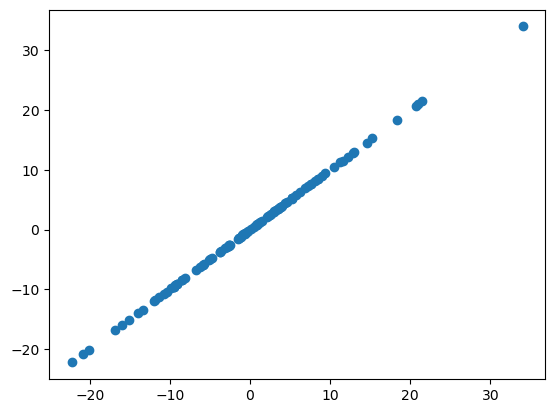

34.02045382676376 -22.274575102392532


PyObject <matplotlib.collections.PathCollection object at 0x7fba9ee64ed0>

In [23]:
b = rand(Normal(0, 10), 100)
println( maximum(b)," ", minimum(b))

using PyPlot
scatter(b, b)

In [24]:
using Distributions
using Random

Random.rand(59)
regX = rand(100)
regY = 100 * regX + rand(Normal(0, 10), 100)
println( maximum(regX)," ", minimum(regX))
println( maximum(regY)," ", minimum(regY))

0.9749172453195936 0.001370501022690096
112.00758355111044 -19.64433000117947


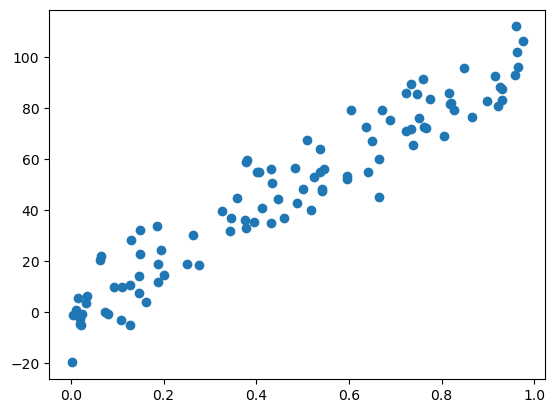

PyObject <matplotlib.collections.PathCollection object at 0x7fba9ee8e910>

In [25]:
using PyPlot
scatter(regX, regY)

In [32]:
regData = []
for i in 1:length(regX)
    push!(regData, (regX[i], regY[i]))
end

regData[1]

0.9148676016854871

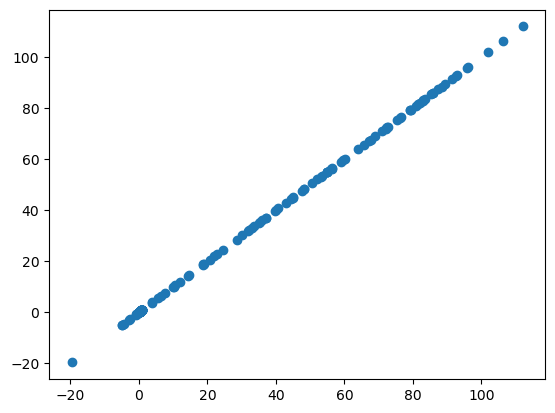

PyObject <matplotlib.collections.PathCollection object at 0x7fbaa0578b50>

In [30]:
using PyPlot
scatter(regData, regData)

In [51]:
using Flux
using Flux: @epochs

modelReg = Chain(
    Dense(1, 1 , softmax)
)

Chain(Dense(1, 1, softmax))

In [52]:
loss(x, y) = Flux.mse(modelReg(x), y)

loss (generic function with 1 method)

In [53]:
#opt = SGD(Flux.params(modelReg), 0.1)
opt = Descent(0.1) # η::Float64

Descent(0.1)

In [54]:
parameters = Flux.params(modelReg)

Params([Float32[1.1037179] (tracked), Float32[0.0] (tracked)])

In [55]:
@epochs 100 Flux.train!(loss, parameters, regData, opt)

┌ Info: Epoch 1
└ @ Main /Users/uki/.julia/packages/Flux/qXNjB/src/optimise/train.jl:105


MethodError: MethodError: no method matching (::Dense{typeof(softmax),TrackedArray{…,Array{Float32,2}},TrackedArray{…,Array{Float32,1}}})(::Float64)
Closest candidates are:
  Any(!Matched::AbstractArray{T,N} where N) where {T<:Union{Float32, Float64}, W<:(AbstractArray{T,N} where N)} at /Users/uki/.julia/packages/Flux/qXNjB/src/layers/basic.jl:110
  Any(!Matched::AbstractArray{#s106,N} where N where #s106<:Real) where {T<:Union{Float32, Float64}, W<:(AbstractArray{T,N} where N)} at /Users/uki/.julia/packages/Flux/qXNjB/src/layers/basic.jl:113
  Any(!Matched::AbstractArray) at /Users/uki/.julia/packages/Flux/qXNjB/src/layers/basic.jl:98

In [56]:
predX = linspace(0, 1)
predY = modelReg(predX').data

UndefVarError: UndefVarError: linspace not defined

In [57]:
scatter(regX, regY)
scatter(predX, predY)

UndefVarError: UndefVarError: predX not defined

In [58]:
println(Flux.params(modelReg))

Params([Float32[1.1037179] (tracked), Float32[0.0] (tracked)])
